<a href="https://colab.research.google.com/github/AbhiRam36/decisiontree-536/blob/main/decisionTree3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
from math import*

In [230]:
import copy
from graphviz import Digraph

In [272]:
dataset='dermatology'
split_func='IG'

In [273]:
datasets={'weather':['https://raw.githubusercontent.com/AbhiRam36/decisiontree-536/main/eighthr.data.csv','0'],'dermatology':['https://raw.githubusercontent.com/AbhiRam36/decisiontree-536/main/dermatology.data.csv','2'],'echo':['https://raw.githubusercontent.com/AbhiRam36/decisiontree-536/main/echocardiogram.data.csv','71'],'lymphography':['https://raw.githubusercontent.com/AbhiRam36/decisiontree-536/main/lymph.csv','lymphatics'],'heart':['https://raw.githubusercontent.com/AbhiRam36/decisiontree-536/main/SPECTF.train.csv' ,'1']}

In [274]:
dataset_url,target_name=datasets[dataset]
data=pd.read_csv(dataset_url)
data=data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [276]:
print(data)

     2  2.1  0  3  0.1  0.2  0.3  0.4  1  0.5  ...  0.19  0.20  3.2  0.21  \
0    3    3  3  2    1    0    0    0  1    1  ...     0     0    0     0   
1    2    1  2  3    1    3    0    3  0    0  ...     0     2    3     2   
2    2    2  2  0    0    0    0    0  3    2  ...     3     0    0     0   
3    2    3  2  2    2    2    0    2  0    0  ...     2     3    2     3   
4    2    3  2  0    0    0    0    0  0    0  ...     0     0    2     0   
..  ..  ... .. ..  ...  ...  ...  ... ..  ...  ...   ...   ...  ...   ...   
360  2    1  1  0    1    0    0    0  0    0  ...     0     0    1     0   
361  3    2  1  0    1    0    0    0  0    0  ...     1     0    1     0   
362  3    2  2  2    3    2    0    2  0    0  ...     0     3    0     3   
363  2    1  3  1    2    3    0    2  0    0  ...     0     2    0     1   
364  3    2  2  0    0    0    0    0  3    3  ...     2     0    0     0   

     0.22  0.23  1.1  0.24  55  2.3  
0       0     0    1     0   8    1  

In [278]:
data

,2,2.1,0,3,0.1,0.2,0.3,0.4,1,0.5,...,0.19,0.20,3.2,0.21,0.22,0.23,1.1,0.24,55,2.3
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
361,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
362,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
363,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [279]:
print(pd.DataFrame(data))
df=pd.DataFrame(data)
df.dtypes

     2  2.1  0  3  0.1  0.2  0.3  0.4  1  0.5  ...  0.19  0.20  3.2  0.21  \
0    3    3  3  2    1    0    0    0  1    1  ...     0     0    0     0   
1    2    1  2  3    1    3    0    3  0    0  ...     0     2    3     2   
2    2    2  2  0    0    0    0    0  3    2  ...     3     0    0     0   
3    2    3  2  2    2    2    0    2  0    0  ...     2     3    2     3   
4    2    3  2  0    0    0    0    0  0    0  ...     0     0    2     0   
..  ..  ... .. ..  ...  ...  ...  ... ..  ...  ...   ...   ...  ...   ...   
360  2    1  1  0    1    0    0    0  0    0  ...     0     0    1     0   
361  3    2  1  0    1    0    0    0  0    0  ...     1     0    1     0   
362  3    2  2  2    3    2    0    2  0    0  ...     0     3    0     3   
363  2    1  3  1    2    3    0    2  0    0  ...     0     2    0     1   
364  3    2  2  0    0    0    0    0  3    3  ...     2     0    0     0   

     0.22  0.23  1.1  0.24  55  2.3  
0       0     0    1     0   8    1  

2        int64
2.1      int64
0        int64
3        int64
0.1      int64
0.2      int64
0.3      int64
0.4      int64
1        int64
0.5      int64
0.6      int64
0.7      int64
0.8      int64
0.9      int64
0.10     int64
3.1      int64
2.2      int64
0.11     int64
0.12     int64
0.13     int64
0.14     int64
0.15     int64
0.16     int64
0.17     int64
0.18     int64
0.19     int64
0.20     int64
3.2      int64
0.21     int64
0.22     int64
0.23     int64
1.1      int64
0.24     int64
55      object
2.3      int64
dtype: object

In [281]:
print(df.count())
print(sum(df[target_name].value_counts().to_dict().values()))

2       365
2.1     365
0       365
3       365
0.1     365
0.2     365
0.3     365
0.4     365
1       365
0.5     365
0.6     365
0.7     365
0.8     365
0.9     365
0.10    365
3.1     365
2.2     365
0.11    365
0.12    365
0.13    365
0.14    365
0.15    365
0.16    365
0.17    365
0.18    365
0.19    365
0.20    365
3.2     365
0.21    365
0.22    365
0.23    365
1.1     365
0.24    365
55      365
2.3     365
dtype: int64
365


In [282]:
import random
def train_test_split(df,test_size):
  df=df.sample(frac = 1)
  n=len(df)
  no_test_rows=int(n*test_size)
  l=list(random.sample(list(range(n)), no_test_rows))
  test=df.iloc[l]
  train=df.drop(l,axis=0)
  return train.sample(frac = 1),test.sample(frac = 1)
# test_df=data
df,test_df=train_test_split(df,0.3)
print(len(df),len(test_df))

256 109


In [283]:
class DecisionTree():
  
  ## Class Member Functions ##

  def entropy_help(p):
    return -p*log(p,2)
  
  def getEntropy(df,target_name):  
    n=df.count()[0]
    target_counts=df[target_name].value_counts().to_dict()
    s=0
    for p in target_counts.values():
      if p/n==1 or p/n==0:
        return 0
      s+=DecisionTree.entropy_help(p/n)
    # print(s)
    return s
  
  def getProbability(df,column,value):
    return df[df[column]==value].count()[0]/df.count()[0]
  
  def informationGain(df,target_name,col):
    # print("Entropy of ",col,DecisionTree.getEntropy(df,target_name))
    total_entropy=DecisionTree.getEntropy(df,target_name)
    col_vals_count=df[col].value_counts().to_dict()
    sum=0
    for value in col_vals_count:
      n=col_vals_count[value]
      # print("Entropy of ",col,value,DecisionTree.getEntropy(df[df[col]==value],target_name))
      sum+=(DecisionTree.getEntropy(df[df[col]==value],target_name)*DecisionTree.getProbability(df,col,value))
    # print("IG: ",target_name,col,total_entropy-sum)
    return total_entropy-sum

  ## Class Data Members ##

  split_functions={'IG':informationGain}
  
  ## Countructor ##
  def __init__(self,df,target_name,split_function="IG",level=-1,leaf_nodes=-1):
    self.tree=self.Tree()
    self.df=df
    self.target_name=target_name
    self.cols=list(self.df.columns)
    self.cols.remove(self.target_name)
    self.cnt=0
    self.gnodes=[]
    self.level=level
    self.leaf_nodes=leaf_nodes
    self.rules=[]
    self.output_classes=self.df[self.target_name].unique()
    if split_function in DecisionTree.split_functions:
      self.split_function=DecisionTree.split_functions[split_function]
    else:
      raise Exception("Split function not found")

  ## Instance Methods ##

  def getGraph(self):
    return self.tree.g

  def find_leaf(self,df):
    counts=df[self.target_name].value_counts().to_dict()
    return max(zip(counts.values(), counts.keys()))[1]
    
      # unique_vals=list(df[self.target_name].unique())
      # for val in unique_vals:      
      #   if df[df[self.target_name]==val].count()[0]==df.count()[0]:
      #     return val

  def construct(self):
    maxig=[-1,""]
    for i in self.cols:
      etemp=self.split_function(df,self.target_name,i)
      maxig=maxig if maxig[0]>etemp else [etemp,i]
    root=self.Node(maxig[1],maxig[0],0)
    self.tree.insert_root(root)
    c=copy.deepcopy(self.cols)
    c.remove(root.name)
    root.gname=str(root)
    self.gnodes.append(root)
    self.tree.g.node(str(root),str(root))
    self.construct_help(df,c,root)

  def construct_help(self,df,cols,parent):
    if not parent.name:
      return
    vals=list(df[parent.name].unique())
    dftemp=df

    for k in vals:
      if self.leaf_nodes!=-1 and self.tree.no_leafs>=self.leaf_nodes:
        return
      df=dftemp
      df=df[df[parent.name]==k]
      e=DecisionTree.getEntropy(df,self.target_name)

      if e==0 or parent.level==self.level-1:
        value=self.find_leaf(df)
        node=self.Node(value,1,parent.level+1)
        node.gname=str(value)
        parent.insert_child(node)
        parent.insert_edge(k)
        self.tree.no_leafs+=1
        name=value
        if not isinstance(value, str):
          name='class'
        self.tree.g.node(name+str(self.cnt),str(value))
        self.tree.g.edge(str(parent.gname),name+str(self.cnt),label=str(k))
        
        self.cnt+=1
        continue
      maxig=[-1,""]
      for i in cols:
        etemp=self.split_function(df,self.target_name,i)
        maxig=maxig if maxig[0]>etemp else [etemp,i]
      node=self.Node(maxig[1],maxig[0],parent.level+1)
      node.gname=str(node.name)
      c=copy.deepcopy(cols)
      if node.name in c:
        c.remove(node.name)
      name=str(node)

      # checking if node name already exist in graphviz code
      
      if name in self.gnodes:
        name+=str(self.cnt)
        self.cnt+=1
      else:
        self.gnodes.append(name)
      node.gname=name

      parent.insert_child(node)
      parent.insert_edge(k)

      self.tree.g.node(name,str(node))
      self.tree.g.edge(str(parent.gname),name,label=str(k))
      
      self.construct_help(df[df[parent.name]==k],c,node)
      
  def predict(self,instances,trace=False):
    node=self.tree.root
    op=[]
    if isinstance(instances,dict):
      return self.predict_help(node,instances,trace,"")
    if isinstance(instances,list):
      
      for instance in instances:
        op.append(self.predict_help(node,instance,trace,""))
    else:
      n=len(instances)
      for i in range(n):
        instance=data.iloc[i].to_dict()
        op.append(self.predict_help(node,instance,trace,""))
    return op

  def predict_help(self,node,instance,trace,path):
    if node.name in self.output_classes:
      if trace:
        print(path+str(node))
      return node.name
    value=instance[node.name]
    try:
      path+=str(node)+" ( "+str(value)+" ) -> "
      ind=node.edges.index(value)
      return self.predict_help(node.childs[ind],instance,trace,path)
    except Exception as e:
      return "Not valid instance, path: "+path
  def get_rules(self):
    node=self.tree.root
    self.rules_help(node,str(node.name)+" -> ")
    return self.rules

  def rules_help(self,node,path):
    for n,e in zip(node.childs,node.edges):
      if n.name in self.output_classes:
        self.rules.append("{} ( {} ) {}".format(path,str(e),str(n.name)))
      self.rules_help(n,"{} ( {} ) {} -> ".format(path,str(e),str(n.name)))
  
  ## Inner classes ##
  class Node:
    ## Countructor ##
    def __init__(self,name,ig,level):
      self.name=name
      self.ig=ig
      self.childs=[]
      self.edges=[]
      self.gname=''
      self.level=level

    ## Instance Methods ##

    def insert_child(self,node):
      self.childs.append(node)

    def insert_edge(self,edge):
      self.edges.append(edge)

    def printn(self,edge=""):
      # if self.childs:
      dashes="|"+"-"*(self.level*5)
      value="( "+str(edge)+") "+str(self.gname) if edge else str(self.gname)
      # print(" "*(self.level*2+1),''.join(['-']*31))
      # print(dashes,'|{:^15} - level - {:^2} | '.format(self.gname,self.level),list(zip(self.edges,list(map(lambda x:x.gname,self.childs)))))
      # print(" "*(self.level*2+1),''.join(['-']*31))
      print(dashes,value)

    def __str__(self):
      return str(self.name)

  class Tree:

    ## Countructor ##
    def __init__(self):
      self.root=None
      self.g=Digraph(encoding='utf-8')
      self.no_leafs=0

    ## Instance Methods ##

    def insert_root(self,node):
      self.root=node

    def printt(self):
      self.print_help(self.root,"")

    def print_help(self,node,edge):
      if node:
        node.printn(edge)
        # print("(",edge,")")
      for i in range(len(node.childs)):
        self.print_help(node.childs[i],node.edges[i])

In [284]:
d=DecisionTree(data,target_name,split_function=split_func)

In [285]:
d.construct()

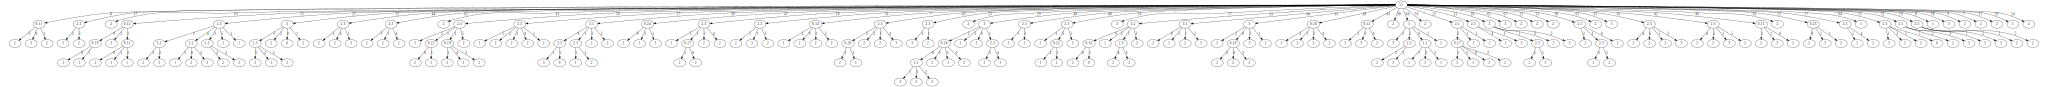

In [286]:
d.getGraph()

In [287]:
print(d.tree.no_leafs)

181


In [288]:
d.get_rules()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


['55 ->  ( 8 ) 0.11 ->  ( 2 ) 2',
 '55 ->  ( 8 ) 0.11 ->  ( 0 ) 3',
 '55 ->  ( 8 ) 0.11 ->  ( 1 ) 2',
 '55 ->  ( 37 ) 2.3 ->  ( 2 ) 3',
 '55 ->  ( 37 ) 2.3 ->  ( 3 ) 2',
 '55 ->  ( 63 ) 2',
 '55 ->  ( 35 ) 0.12 ->  ( 0 ) 0.19 ->  ( 0 ) 2',
 '55 ->  ( 35 ) 0.12 ->  ( 0 ) 0.19 ->  ( 1 ) 3',
 '55 ->  ( 35 ) 0.12 ->  ( 2 ) 3',
 '55 ->  ( 35 ) 0.12 ->  ( 1 ) 0.11 ->  ( 0 ) 2',
 '55 ->  ( 35 ) 0.12 ->  ( 1 ) 0.11 ->  ( 1 ) 1',
 '55 ->  ( 35 ) 0.12 ->  ( 1 ) 0.11 ->  ( 2 ) 1',
 '55 ->  ( 25 ) 2.3 ->  ( 2 ) 3.2 ->  ( 3 ) 2',
 '55 ->  ( 25 ) 2.3 ->  ( 2 ) 3.2 ->  ( 2 ) 3',
 '55 ->  ( 25 ) 2.3 ->  ( 4 ) 2.2 ->  ( 1 ) 1',
 '55 ->  ( 25 ) 2.3 ->  ( 4 ) 2.2 ->  ( 0 ) 2',
 '55 ->  ( 25 ) 2.3 ->  ( 4 ) 2.2 ->  ( 2 ) 3',
 '55 ->  ( 25 ) 2.3 ->  ( 3 ) 1.1 ->  ( 2 ) 2',
 '55 ->  ( 25 ) 2.3 ->  ( 3 ) 1.1 ->  ( 3 ) 3',
 '55 ->  ( 25 ) 2.3 ->  ( 5 ) 1',
 '55 ->  ( 25 ) 2.3 ->  ( 1 ) 1',
 '55 ->  ( 52 ) 3 ->  ( 3 ) 2.3 ->  ( 3 ) 3',
 '55 ->  ( 52 ) 3 ->  ( 3 ) 2.3 ->  ( 2 ) 3',
 '55 ->  ( 52 ) 3 ->  ( 3 ) 2

In [289]:
inp=[]
n=1000
n=n if n < len(test_df) else len(test_df)
for i in range(n):
  inp.append(test_df.iloc[i].to_dict())
print(d.predict(inp))


[0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 1, 2, 1, 2, 3, 2, 1, 3, 3, 2, 2, 1, 2, 2, 3, 'Not valid instance, path: 55 ( 50 ) -> 2.3 ( 4 ) -> ', 3, 2, 1, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 'Not valid instance, path: 55 ( 48 ) -> 2.3 ( 5 ) -> ', 'Not valid instance, path: 55 ( 17 ) -> 2.3 ( 1 ) -> ', 1, 2, 2, 2, 1, 1, 1, 1, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 1, 2, 2, 2, 0, 2, 1, 2, 'Not valid instance, path: 55 ( 48 ) -> 2.3 ( 4 ) -> ', 3, 2, 2, 3, 3]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [290]:
d.tree.printt()

| 55
|----- ( 8) 0.11
|---------- ( 2) 2
|---------- 3
|---------- ( 1) 2
|----- ( 37) 2.3
|---------- ( 2) 3
|---------- ( 3) 2
|----- ( 63) 2
|----- ( 35) 0.12
|---------- 0.19
|--------------- 2
|--------------- ( 1) 3
|---------- ( 2) 3
|---------- ( 1) 0.119
|--------------- 2
|--------------- ( 1) 1
|--------------- ( 2) 1
|----- ( 25) 2.313
|---------- ( 2) 3.2
|--------------- ( 3) 2
|--------------- ( 2) 3
|---------- ( 4) 2.2
|--------------- ( 1) 1
|--------------- 2
|--------------- ( 2) 3
|---------- ( 3) 1.1
|--------------- ( 2) 2
|--------------- ( 3) 3
|---------- ( 5) 1
|---------- ( 1) 1
|----- ( 52) 3
|---------- ( 3) 2.323
|--------------- ( 3) 3
|--------------- ( 2) 3
|--------------- ( 5) 2
|---------- ( 2) 2
|---------- 0
|---------- ( 1) 2
|----- ( 44) 2.330
|---------- ( 3) 2
|---------- ( 4) 2
|---------- ( 2) 3
|----- ( 62) 2.334
|---------- ( 3) 2
|---------- ( 1) 2
|---------- ( 4) 1
|----- ( 41) 2
|----- ( 50) 2.339
|---------- ( 2) 3
|---------- ( 3) 0.

In [291]:
o=list(enumerate(d.predict(data)))
o

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


[(0, 3),
 (1, 2),
 (2, 2),
 (3, 2),
 (4, 2),
 (5, 1),
 (6, 2),
 (7, 1),
 (8, 2),
 (9, 3),
 (10, 'Not valid instance, path: 55 ( 21 ) -> 2.3 ( 2 ) -> '),
 (11, 1),
 (12, 2),
 (13, 3),
 (14, 1),
 (15, 2),
 (16, 2),
 (17, 2),
 (18, 1),
 (19, 2),
 (20, 3),
 (21, 2),
 (22, 2),
 (23, 2),
 (24, 'Not valid instance, path: 55 ( 33 ) -> 3 ( 0 ) -> 0.16 ( 1 ) -> '),
 (25, 1),
 (26, 1),
 (27, 3),
 (28, 1),
 (29, 3),
 (30, 3),
 (31, 2),
 (32, 2),
 (33, 2),
 (34, 2),
 (35, 2),
 (36, 2),
 (37, 2),
 (38, 3),
 (39, 3),
 (40, 1),
 (41, 2),
 (42, 2),
 (43, 0),
 (44, 2),
 (45, 2),
 (46, 2),
 (47, 2),
 (48, 3),
 (49, 3),
 (50, 1),
 (51, 2),
 (52, 3),
 (53, 0),
 (54, 2),
 (55, 1),
 (56, 2),
 (57, 1),
 (58, 3),
 (59, 2),
 (60, 2),
 (61, 1),
 (62, 3),
 (63, 2),
 (64, 3),
 (65, 2),
 (66, 1),
 (67, 3),
 (68, 3),
 (69, 2),
 (70, 2),
 (71, 2),
 (72, 'Not valid instance, path: 55 ( 48 ) -> 2.3 ( 5 ) -> '),
 (73, 2),
 (74, 3),
 (75, 1),
 (76, 2),
 (77, 0),
 (78, 1),
 (79, 3),
 (80, 3),
 (81, 2),
 (82, 3),
 (83, 1),

In [292]:
data[target_name]

0      3
1      2
2      2
3      2
4      2
      ..
360    2
361    3
362    3
363    2
364    3
Name: 2, Length: 365, dtype: int64

In [293]:
count=0
for i in o:
  if i[1]=='Not valid instance':
    print("Something went wrong")
    count+=1
print(count)

0


In [294]:
print(df.iloc[0].to_dict())
d.predict(df.iloc[0].to_dict(),trace=True)

{'2': 2, '2.1': 2, '0': 2, '3': 0, '0.1': 0, '0.2': 0, '0.3': 2, '0.4': 0, '1': 2, '0.5': 0, '0.6': 0, '0.7': 0, '0.8': 0, '0.9': 0, '0.10': 0, '3.1': 2, '2.2': 2, '0.11': 2, '0.12': 2, '0.13': 0, '0.14': 0, '0.15': 0, '0.16': 0, '0.17': 0, '0.18': 0, '0.19': 0, '0.20': 0, '3.2': 0, '0.21': 0, '0.22': 2, '0.23': 2, '1.1': 2, '0.24': 0, '55': '8', '2.3': 6}
55 ( 8 ) -> 0.11 ( 2 ) -> 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


2